### INSTRUCTIONS - Assignment 3

- Submit only the ipynb file with file format main_{UBID}.ipynb (e.g. main_50370999.ipynb), Submission other than this format will get zero.
- Don't submit the zip folder.
- We will run all the cells from start to finish, if we get any error or cell executing for more than 20 sec. will get zero for that problem. So plesae make sure to double check your ipynb file from start to finish before submitting.
- Refrain from using the Sklearn library unless explicitly mentioned.
- Do not use numpy's cov, corrcoef, svd built-in functions.
- Don't import additional libraries in the file.

# Dataset information

There are a total of 4 datasets for the assignment.

For Assignment3, please choose the dataset according to the following rule.

Student UBID + 1 modulo 4 = (number between 0 and 3). For example: (50370006 + 1) % 4 = 3

### 0 - UCI dermatology dataset (Target_variable: classcode)

Link: https://archive.ics.uci.edu/ml/datasets/Dermatology

Features to use -> {erythema, scaling, definite borders, itching}

### 1 - MAGIC Gamma Telescope Data Set (Target_variable: class: g,h # gamma (signal), hadron (background))

Link: https://archive.ics.uci.edu/ml/datasets/magic%2Bgamma%2Btelescope

Features to use -> {fLength, fWidth, fSize, fConc}

### 2 - Automobile dataset (Target_variable: body-type)

Link: https://archive.ics.uci.edu/ml/datasets/Automobile

Features to use -> {length, width, height, horsepower}

### 3 - Glass dataset (Target_variable: glass_type)

Link: https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data

Features to use -> {refractive_index, sodium, aluminium, silicon}

Perform all the tasks in the assignment only for one single dataset.

# Feature information

For this assignment, students must start with the 4 features for their respective datasets, use PCA and LDA to get the 2 most significant features as they continue to solve the assignment.

In [54]:
# imports
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

Step 1: load the dataset

In [55]:
# loads csv file into pandas dataframe
df = pd.read_csv('dematology.csv')
features = ['erythema', 'scaling', 'definite borders', 'itching']
featuresWithClass = ['erythema', 'scaling', 'definite borders', 'itching','Classcode']
Y,y = df['Classcode'],df['Classcode'].tolist()
df.drop(df.columns.difference(features), 1, inplace=True)
print(Y.unique())

[2 1 3 5 4 6]


C:\Users\17164\AppData\Local\Temp\ipykernel_10340\712756374.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(features), 1, inplace=True)


In [62]:
y[y==6]

2

# Step 2 - 8: PCA implementation 



# Step 2: Normalize the feature columns

Hint: you can use the imported StandardScaler

In [44]:
scaler = StandardScaler()
dfNormalized = scaler.fit_transform(df)
# dfNormalizedTranspose = scaler.transform(df.T)
# dfNormalizedMean = dfNormalized.mean()
# dfNormalizedMean
meanFeature = []
for arr in dfNormalized.T:
    print(sum(arr))
    meanFeature.append(sum(arr)/len(arr))
# print(meanFeature[0],len(dfNormalized.T[0]))
# print(dfNormalized.T.shape)
print(dfNormalized.shape)

-7.860379014346108e-14
1.9317880628477724e-14
-1.521560655248777e-13
1.9095836023552692e-14
(366, 4)


# Eigen decomposition : Compute the eigen values and eigen vectors

Step 3: 
Calculate the covariance between the feature columns. This should be a d x d matrix, where d is the number of features. 
$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).$

In matrix notation:   
$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$  
where $\mathbf{\bar{x}}$ is the mean vector

In [45]:
# # print(trans)
# transpose = dfNormalized.T
# for ind,arr in enumerate(transpose):
#     transpose[ind] = transpose[ind]-meanFeature[ind]
#     # ans = np.add(ans,arr.T*arr)
#     # break
# # print('New')
# # print(trans)
# covfeature = 1/3 * (np.dot(transpose,transpose.T))
# covfeature
mean_vec = np.mean(dfNormalized, axis=0)
covMat = (dfNormalized - mean_vec).T.dot((dfNormalized - mean_vec)) / (dfNormalized.shape[0]-1)
print('Covariance matrix is \n%s' %covMat)

Covariance matrix is 
[[ 1.00273973  0.4366598   0.26079971 -0.0477533 ]
 [ 0.4366598   1.00273973  0.35896795 -0.08442798]
 [ 0.26079971  0.35896795  1.00273973 -0.06273517]
 [-0.0477533  -0.08442798 -0.06273517  1.00273973]]


# Step 4 : Find the eigen values and eigen vectors that represent the feature space.

The eigenvectors (principal components) will be used to determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues will explain the variance of the data along the feature axes.




In [46]:
eigenValue, eigenVectors = np.linalg.eig(covMat)
print('Eigen Values \n ',eigenValue)
print()
print('Eigen Vectors \n',eigenVectors)


Eigen Values 
  [1.72951923 0.54523164 0.74977144 0.9864366 ]

Eigen Vectors 
 [[ 0.56823416  0.57674243  0.56992419  0.14023026]
 [ 0.6171384  -0.76998312  0.14720298  0.06780471]
 [ 0.52202207  0.26920453 -0.80723447  0.05826135]
 [-0.15408792 -0.04497882 -0.04347652  0.98607485]]


# Step 5 : Consider k=2, Find k axes in the old feature space that contribute most to the variance of the data.

where k is the number of principal components, i.e the number of axes in the new feature space.

Hint: k largest eigen values and their corressponding eigen vectors

In [47]:

### The eigen vectors are not ordered but printing them we can see that 0th element is the largest and thus the corresponding eigen vector will be principal component for PCA
# principalEigenValue0,principalEigenValue1, principalEigenVector0,principalEigenVector1 = eigenValue[0], eigenValue[-1],eigenVectors[0],eigenVectors[-1]
# print(principalEigenVector0)
# print(principalEigenVector1)

# eigenMatrix = [(principalEigenValue0,np.array(principalEigenVector0)),(principalEigenValue1,np.array(principalEigenVector1))]
# eigenMatrix[0][1]
K = 2
eig_pairs = [(np.abs(eigenValue[i]), eigenVectors[:,i]) for i in range(len(eigenValue))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues and Eigen Vectors in descending order:')
for i in eig_pairs:
    print(i)
RequiredEigen = []
for i in range(K):
    RequiredEigen.append(eig_pairs[i][1].reshape(len(features),1))
print()
print('Required Eigen :',RequiredEigen)    


print('\nVariance explained:')
eigvSum = sum(eigenValue)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigvSum).real))

Eigenvalues and Eigen Vectors in descending order:
(1.729519231464744, array([ 0.56823416,  0.6171384 ,  0.52202207, -0.15408792]))
(0.9864365951401612, array([0.14023026, 0.06780471, 0.05826135, 0.98607485]))
(0.7497714400563525, array([ 0.56992419,  0.14720298, -0.80723447, -0.04347652]))
(0.5452316374483289, array([ 0.57674243, -0.76998312,  0.26920453, -0.04497882]))

Required Eigen : [array([[ 0.56823416],
       [ 0.6171384 ],
       [ 0.52202207],
       [-0.15408792]]), array([[0.14023026],
       [0.06780471],
       [0.05826135],
       [0.98607485]])]

Variance explained:
eigenvalue 1: 43.12%
eigenvalue 2: 24.59%
eigenvalue 3: 18.69%
eigenvalue 4: 13.59%


# Step 6: Compute the projection matrix

The projection matrix will be of dimension d x k. This matrix will be used in the next step to project the data points in the old feature space to the newly calculated feature space.

Note: The dimension of old feature space is d, whereas the new feature space is k.

Hint: stack the eigen values obtained in the previous step accordingly

In [48]:
projMatrix = np.hstack((RequiredEigen[0].reshape(4,1),RequiredEigen[1].reshape(4,1)))
projMatrix

array([[ 0.56823416,  0.14023026],
       [ 0.6171384 ,  0.06780471],
       [ 0.52202207,  0.05826135],
       [-0.15408792,  0.98607485]])

# Step 7: Project the data points onto the new feature space

The output of this step should be a matrix with dimension, no.of.samples x k

Hint: Use the original data points and the projection matrix computed in step 6 to get the new points.

In [63]:
newMatrix = dfNormalized.dot(projMatrix)
# newMatrix
newDf = pd.DataFrame(columns=['X1','X2','Y'])
for ind,arr in enumerate(newMatrix):
    y1 = int(Y[ind])
    newDf.loc[len(newDf)] = [arr[0],arr[1],y1]
newDf
# Y = dfNormalized.dot(projMatrix)
# Y

,X1,X2,Y
0,-0.991761,1.323132,2.0
1,2.608685,0.956559,1.0
2,-0.720668,1.354919,3.0
3,0.566900,-1.150664,1.0
4,1.176707,0.681034,3.0
...,...,...,...
361,-0.890014,-1.311735,4.0
362,0.846873,-1.003710,4.0
363,1.151771,0.795488,3.0
364,0.126439,-0.315707,3.0


# Step 8: Plot the new data points as a scatter plot

Visualize the new data points on a plot. You can use the imported package matplotlib for this purpose

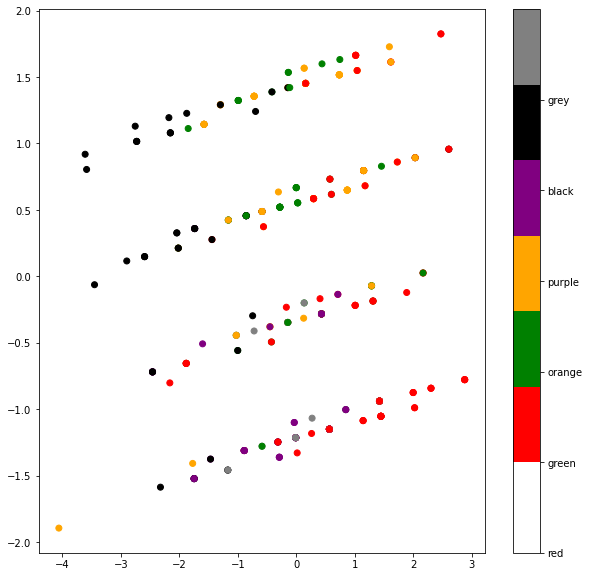

In [65]:
# import matplotlib
# x,y,label = newDf['X1'],newDf['X2'],newDf['Y']
# colors = ['red','green','orange','purple','black','grey']
# fig = plt.figure(figsize=(10,10))
# plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

# cb = plt.colorbar()
# loc = np.arange(0,max(label),max(label)/float(len(colors)))
# cb.set_ticks(loc)
# cb.set_ticklabels(colors)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    for lab, col in zip((2, 1, 3, 5, 4, 6), 
                        ('blue', 'red', 'green','orange','black','grey')):
        # print(y)
        print(Y[y==lab, 0],Y[y==lab, 1])
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

len(set(label))

# Step 9 - 14 Linear Discriminant Analysis

# Step 9 - Prepare the dataset

In [1]:
# Import the dataset again from step 1.
"""
Make sure that the data is normalized and all the null values are removed.
"""
# Insert code below this line

'\nMake sure that the data is normalized and all the null values are removed.\n'

# Step 10 - Computing d-dimensional mean vectors

In this first step, we will start off with a simple computation of the mean vectors $\pmb m_i$, $(i = 1,2,3,..)$ of the different classes:
    
$\pmb m_i = \begin{bmatrix} 
\mu_{\omega_i (\text{feature 1})}\\ 
\mu_{\omega_i (\text{feature 2})}\\ 
\mu_{\omega_i (\text{feature 3)}}\\
\mu_{\omega_i (\text{feature 4})}\\
\end{bmatrix} \; , \quad \text{with} \quad i = 1,2,3,...$

# Step 11 - Computing the Scatter Matrices

## 11.1 Within-class scatter matrix $S_W$

The **within-class scatter** matrix $S_W$ is computed by the following equation:  

$S_W = \sum\limits_{i=1}^{c}  S_i$

where  
$S_i = \sum\limits_{\pmb x \in D_i}^n (\pmb x - \pmb m_i)\;(\pmb x - \pmb m_i)^T$  
(scatter matrix for every class) 

and $\pmb m_i$ is the mean vector    
$\pmb m_i = \frac{1}{n_i} \sum\limits_{\pmb x \in D_i}^n \; \pmb x_k$

## 11.2 Between-class matrix $S_B$

The **between-class scatter** matrix $S_B$ is computed by the following equation:  

$S_B =  \sum\limits_{i=1}^{c} N_{i} (\pmb m_i - \pmb m) (\pmb m_i - \pmb m)^T$

where  
 $\pmb m$ is the overall mean, and $\pmb m_{i}$ and $N_{i}$ are the sample mean and sizes of the respective classes.

# Step 12: Solving the generalized eigenvalue problem for the matrix $S_{W}^{-1}S_B$

Next, we will solve the generalized eigenvalue problem for the matrix $S_{W}^{-1}S_B$ to obtain the linear discriminants.

### Checking the eigenvector-eigenvalue calculation

A quick check that the eigenvector-eigenvalue calculation is correct and satisfy the equation:

$\pmb A\pmb{v} =  \lambda\pmb{v}$  

<br>
where  
$\pmb A = S_{W}^{-1}S_B\\
\pmb{v} = \; \text{Eigenvector}\\
\lambda = \; \text{Eigenvalue}$

In [ ]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1) 
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv), 
                                         eig_vals[i] * eigv, 
                                         decimal=6, err_msg='', verbose=True)

# This cell must run without errors

## Step 13: Selecting linear discriminants for the new feature subspace

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.  
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top $k$ eigenvectors.

In [ ]:
# Eigenvalues in decreasing order:


# 13.1. Choosing *k* eigenvectors with the largest eigenvalues

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our $d \times k$-dimensional eigenvector matrix $\pmb W$ (here $4 \times 2$: based on the 2 most informative eigenpairs) and thereby reducing the initial 4-dimensional feature space into a 2-dimensional feature subspace.

In [ ]:
# Tip: use np.hstack

# Step 14: Transforming the samples onto the new subspace

In the last step, we use the $4 \times 2$-dimensional matrix $\pmb W$ that we just computed to transform our samples onto the new subspace via the equation   

$\pmb Y = \pmb X \times \pmb W $.

(where $\pmb X$ is a $n \times d$-dimensional matrix representing the $n$ samples, and $\pmb Y$ are the transformed $n \times k$-dimensional samples in the new subspace).

# A comparison of PCA and LDA

In [ ]:
# Sample code for the penguins and Iris dataset visualization.
# Do not change the code here.
# Code written in this cell is not graded but is used to grade the output of code from previous cells.

from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)

def plot_pca():

    ax = plt.subplot(111)
    
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
    
    plt.tight_layout
    plt.grid()
    
    plt.show()

In [ ]:
plot_pca()
plot_step_lda()

In [4]:
# Created by Naresh Kumar Devulapally and Sriram Rangarajan